<a href="https://colab.research.google.com/github/Vansh17555555/minor-1/blob/master/M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panic Disorder Detection

the goal of the project is detecting if an individual has a panic disorder or not by using machine learning model which is ombined with best classifiers.Utilizing ml not only will decrease the misdiagnosis cases but reduces cost and examination time.


1. **Introduction**

2. **Loading and checking the Data**
   * 2.1 Loading the Data
   * 2.2 Checking data
     * Counting data points
     * Checking null and missing values

3. **Exploratory Data Analysis**
   * 3.1 Several plots of each feature
   * 3.2 Correlation matrix

4. **Data Preprocessing**
   * 4.1 Encoding of object columns
   * 4.2 Standardization of "Age" Column
   * 4.3 Correlation Matrix

5. **Feature Engineering**
   * 5.1 Creating new features from existing data
   * 5.2 Handling outliers
     * Identifying and visualizing outliers
     * Treating outliers in numerical features

6. **Model Building and Evaluation**
   * 6.1 Splitting the data into training and test sets
   * 6.2 Model selection
     * Trying multiple algorithms
     * Tuning hyperparameters
   * 6.3 Model evaluation metrics
     * Accuracy, Precision, Recall, and F1-Score
     * Cross-validation results

# 1. **Introduction**
   * 1.1 Importing the required modules



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df=pd.read_csv("./Dataset/panic_disorder_dataset_training.csv")
test_df=pd.read_csv("./Dataset/panic_disorder_dataset_testing.csv")
train_df

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,22,Male,Yes,No,High,Chest pain,Mild,Mild,Rural,Heart disease,NaN,NaN,Socializing,Low,Diet,0
99996,99997,57,Female,No,Yes,Low,Panic attacks,Severe,Mild,Rural,Heart disease,Depressive disorder,NaN,Meditation,High,Diet,0
99997,99998,20,Male,Yes,No,Moderate,Panic attacks,Severe,Moderate,Rural,Heart disease,Bipolar disorder,NaN,Seeking therapy,Low,Exercise,0
99998,99999,56,Female,Yes,Yes,High,Chest pain,Severe,Mild,Rural,Diabetes,Anxiety disorder,Drugs,Socializing,High,Sleep quality,1


In [4]:
train_df.head()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0


## Data Features Description (17 Features):

1. **Participant ID**: An exclusive identifier assigned to each participant.

2. **Age**: The participant's age at the time.

3. **Gender**: The participant's gender.

4. **Family History**: Information about the presence of Panic Disorder or other mental health conditions in the participant's family.

5. **Personal History**: Information on the participant's past experiences relevant to mental health.

6. **Current Stressors**: Present stressors in the participant's life that may impact mental health.

7. **Symptoms**: Reported symptoms by the participant.

8. **Severity**: The extent of severity regarding the reported symptoms.

9. **Impact on Life**: Evaluation of how the symptoms affect the participant's daily functioning, including work, relationships, and other domains.

10. **Demographics**: Participant's demographic characteristics.

11. **Medical History**: Participant's general medical background.

12. **Psychiatric History**: Participant's history of psychiatric conditions.

13. **Substance Use**: Participant's usage of substances.

14. **Coping Mechanisms**: Strategies employed by the participant to manage stress or Panic Disorder symptoms.

15. **Social Support**: Quantity and quality of available social support, including friends, family, or other support groups.

16. **Lifestyle Factors**: Factors associated with the participant's lifestyle that may influence mental health, such as sleep habits, dietary patterns, and physical activity.

17. **Panic Disorder Diagnosis**: The diagnosis of panic disorder, indicating whether the participant has panic disorder or not.



# **2.2 Checking Data**
*   Counting data points



In [5]:
print("Training set", train_df.shape)
print("Testing set", test_df.shape)

Training set (100000, 17)
Testing set (20000, 17)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Participant ID            100000 non-null  int64 
 1   Age                       100000 non-null  int64 
 2   Gender                    100000 non-null  object
 3   Family History            100000 non-null  object
 4   Personal History          100000 non-null  object
 5   Current Stressors         100000 non-null  object
 6   Symptoms                  100000 non-null  object
 7   Severity                  100000 non-null  object
 8   Impact on Life            100000 non-null  object
 9   Demographics              100000 non-null  object
 10  Medical History           74827 non-null   object
 11  Psychiatric History       75079 non-null   object
 12  Substance Use             66626 non-null   object
 13  Coping Mechanisms         100000 non-null  object
 14  Socia

#**3. Exploratory Data Analysis (EDA)**
 * 3.1. Several plots of each features


In [7]:
import pandas as pd
train_df.corr(numeric_only=True)



,Participant ID,Age,Panic Disorder Diagnosis
Participant ID,1.000000,-0.001071,0.000182
Age,-0.001071,1.000000,-0.000502
Panic Disorder Diagnosis,0.000182,-0.000502,1.000000


c:\Users\Vansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


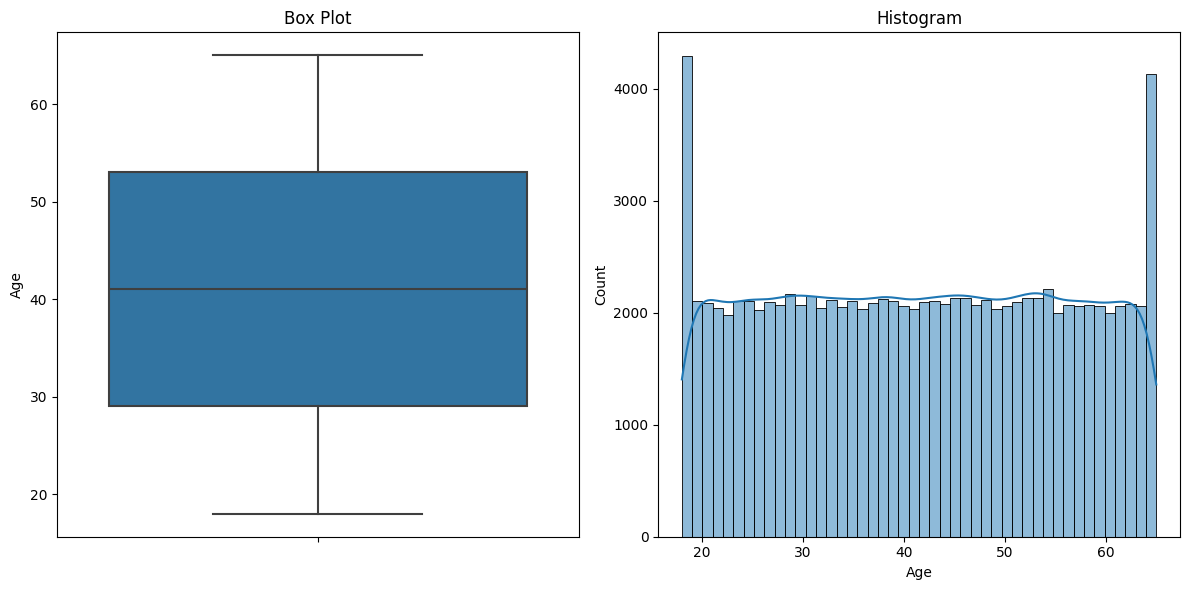

In [8]:
feature = "Age"

# Box Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=train_df[feature])
plt.title('Box Plot')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=train_df, x=feature, kde=True)
plt.title('Histogram')

plt.tight_layout()
plt.show()

c:\Users\Vansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

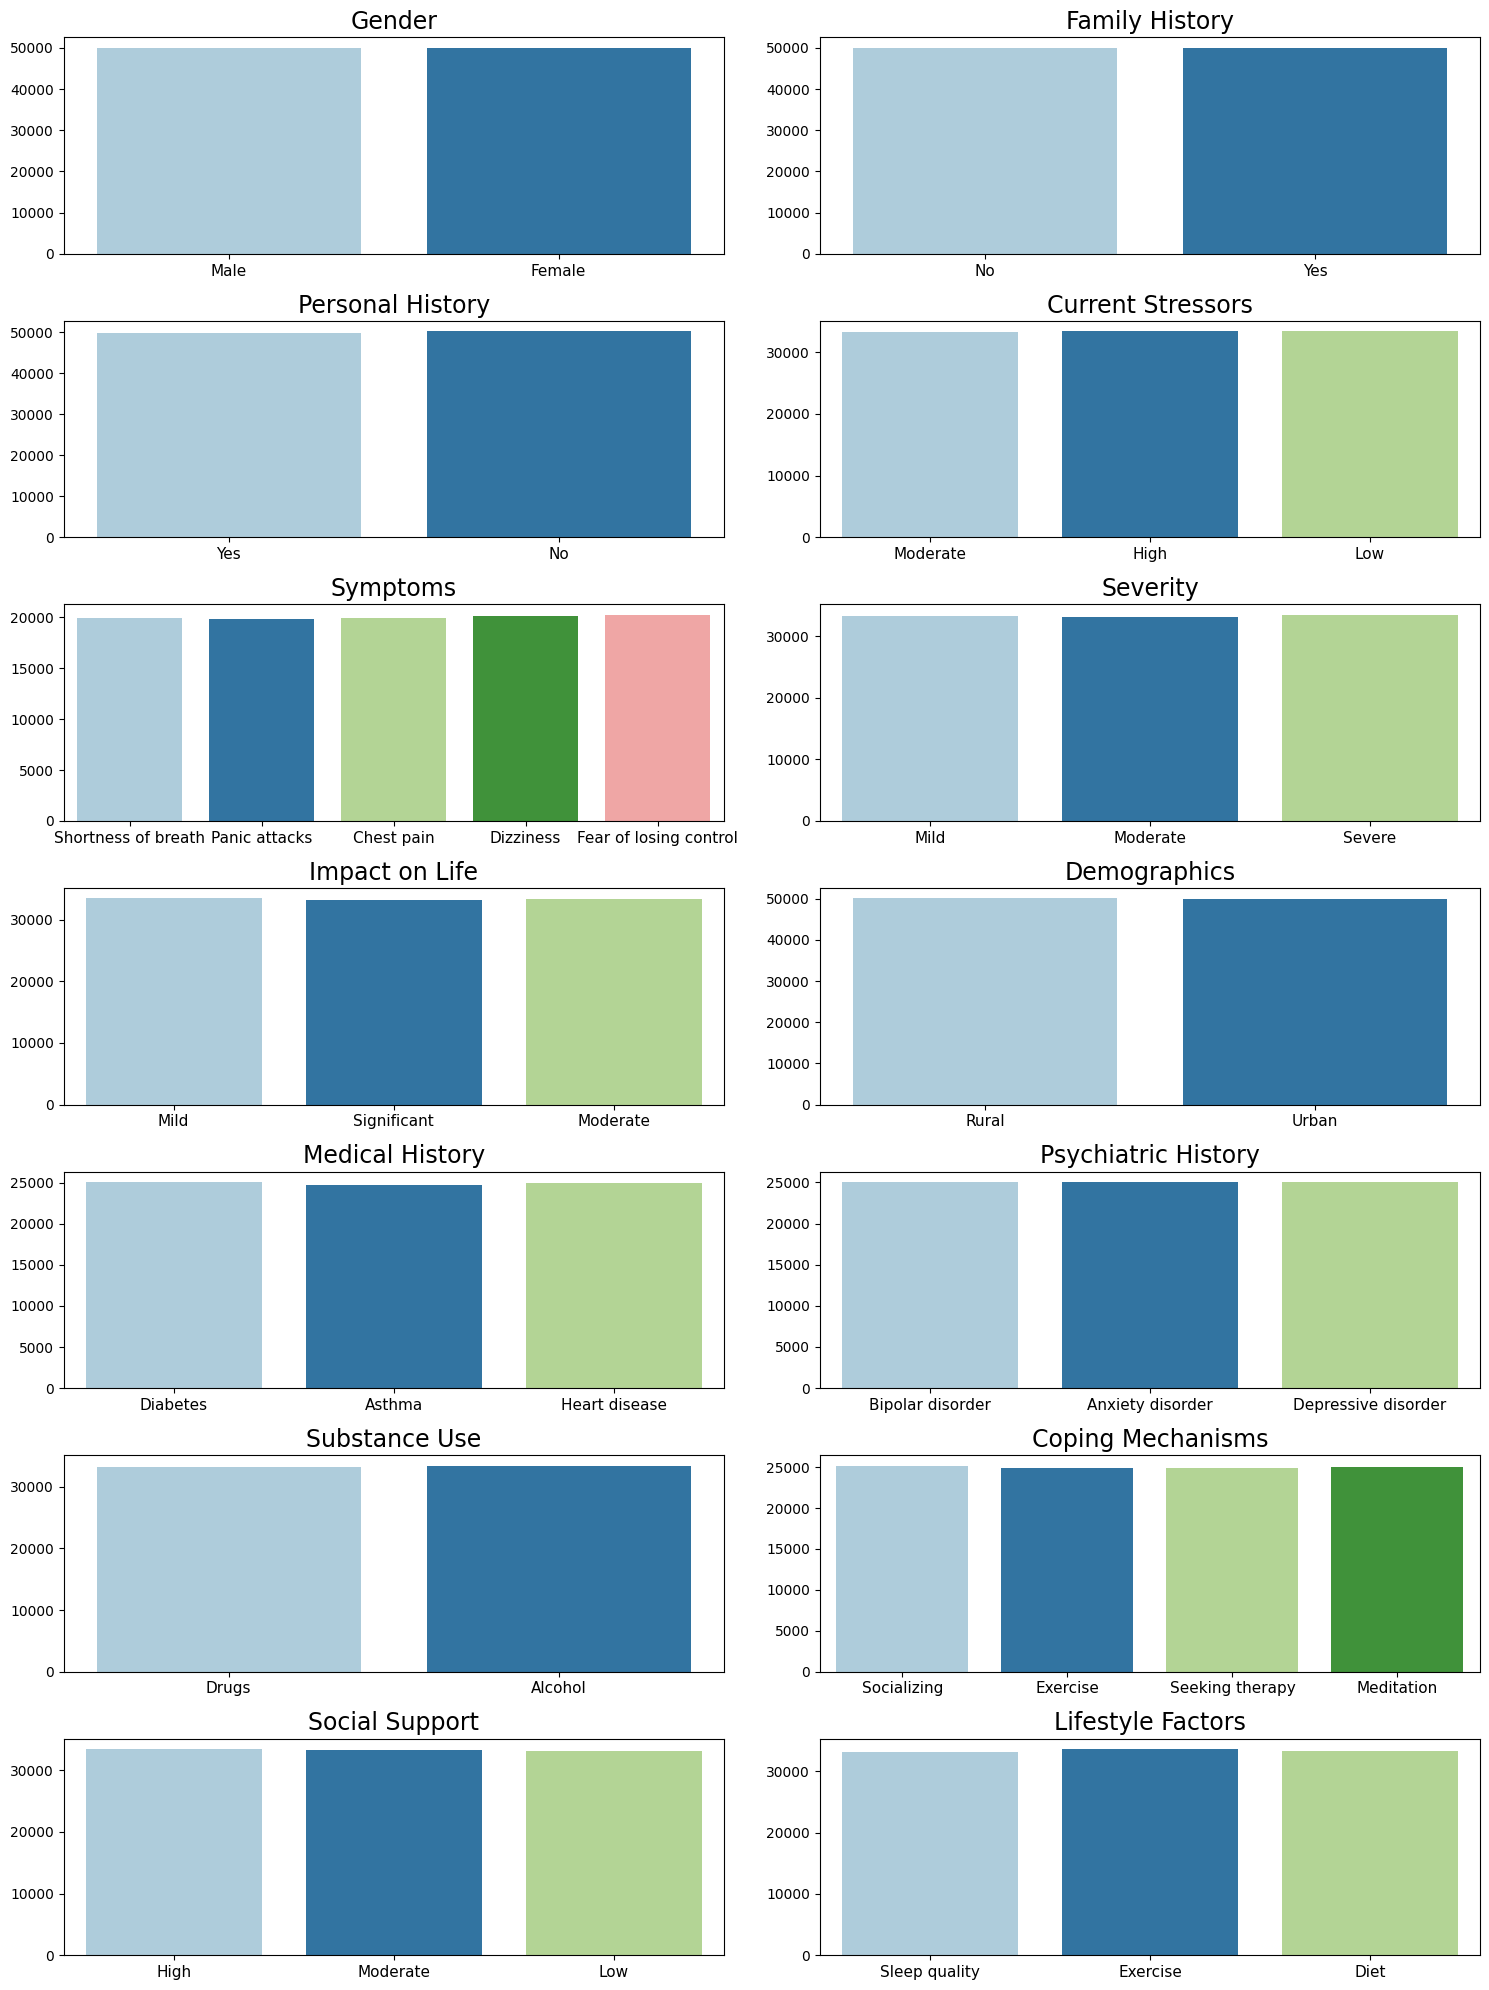

In [9]:
selected_columns = [col for col in train_df.columns if col not in ['Participant ID', 'Age', 'Panic Disorder Diagnosis']]
selected_df = train_df[selected_columns]

plt.figure(figsize=(15, 20))

for i, feature in enumerate(selected_df.columns):
    plt.subplot(7, 2, i+1)
    sns.countplot(data=selected_df, x=feature, palette='Paired')
    plt.xticks(fontsize=11)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(feature, fontsize=17)

plt.tight_layout()
plt.show()

In [10]:
for column in train_df.columns:
    print(f"Value counts for feature '{column}':")
    print(train_df[column].value_counts())
    print()

Value counts for feature 'Participant ID':
Participant ID
1         1
66651     1
66673     1
66672     1
66671     1
         ..
33332     1
33331     1
33330     1
33329     1
100000    1
Name: count, Length: 100000, dtype: int64

Value counts for feature 'Age':
Age
54    2213
29    2164
31    2150
19    2149
18    2139
45    2130
53    2130
46    2129
52    2127
38    2123
33    2117
48    2109
25    2107
39    2106
43    2106
24    2104
20    2103
35    2101
42    2095
51    2093
27    2092
37    2087
21    2085
62    2079
44    2077
47    2072
56    2070
28    2070
64    2069
58    2067
30    2065
40    2062
61    2062
65    2062
57    2060
50    2060
63    2060
59    2059
34    2055
22    2045
32    2039
36    2037
41    2037
49    2034
26    2024
55    2001
60    1999
23    1976
Name: count, dtype: int64

Value counts for feature 'Gender':
Gender
Male      50052
Female    49948
Name: count, dtype: int64

Value counts for feature 'Family History':
Family History
Yes    50042
No  

c:\Users\Vansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

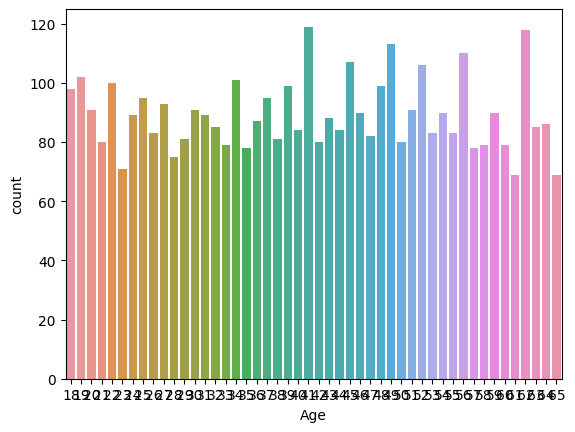

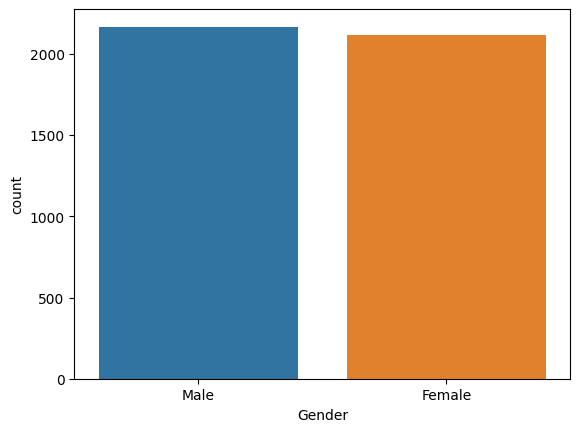

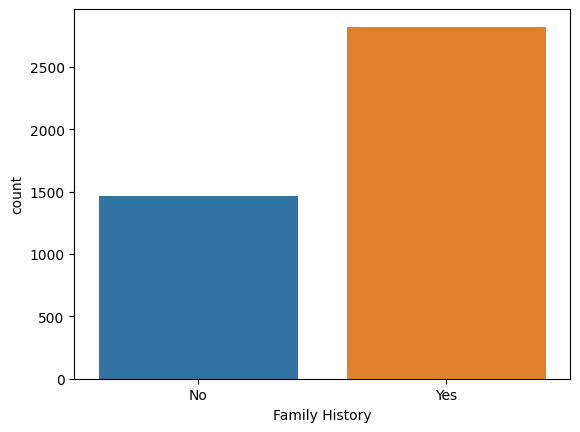

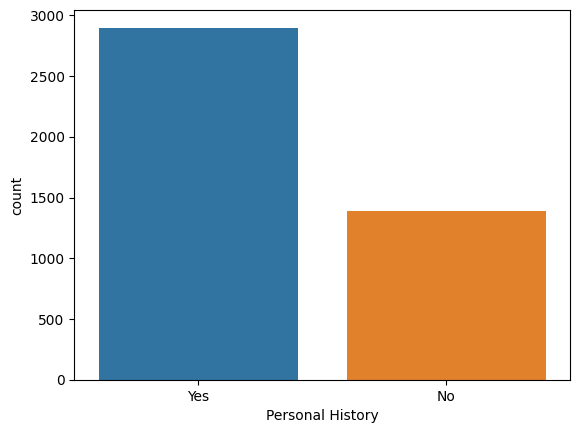

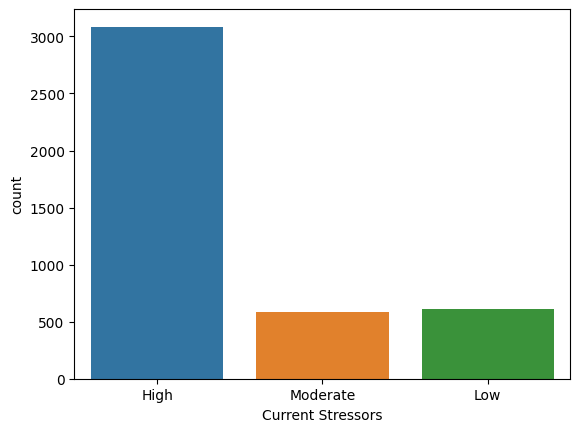

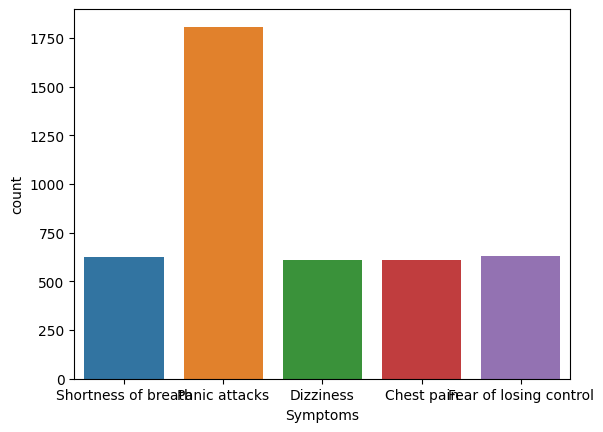

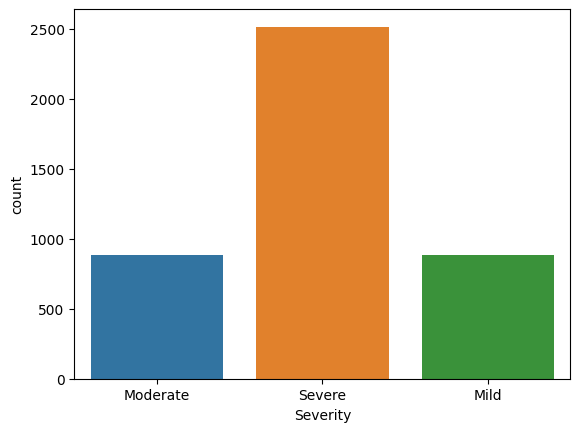

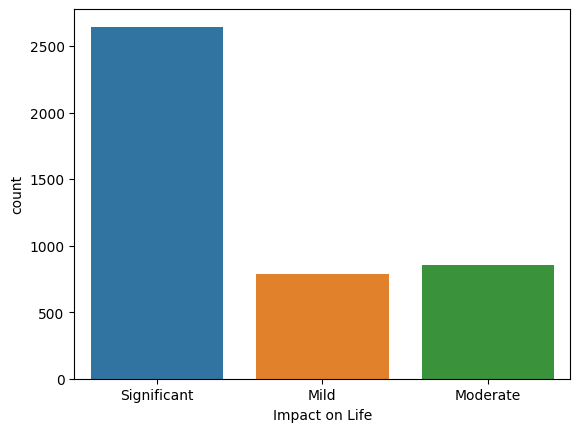

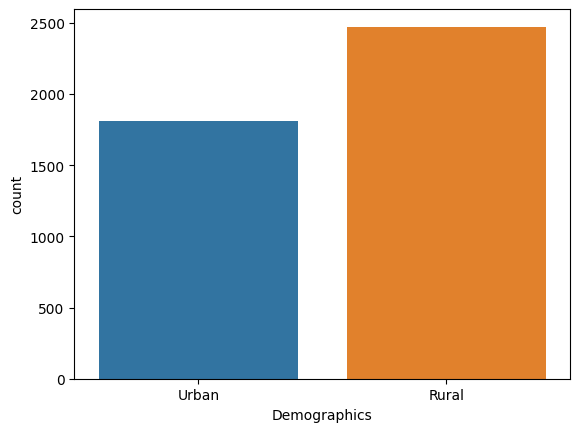

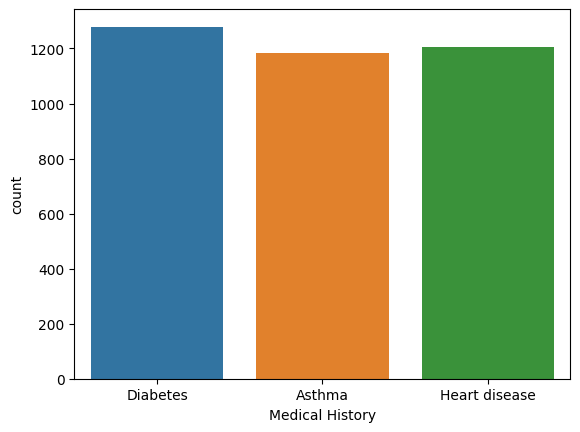

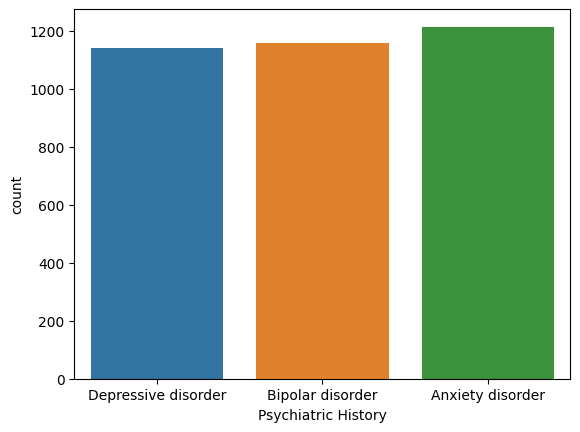

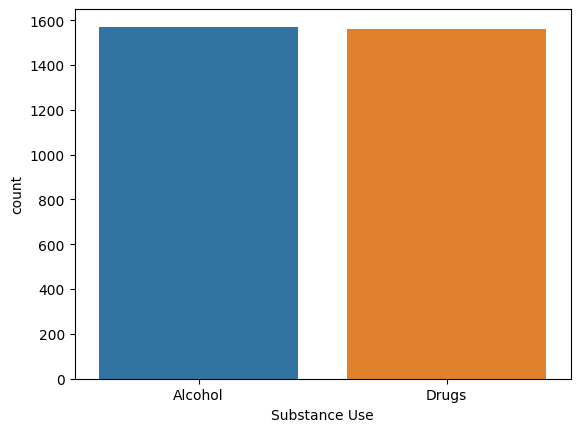

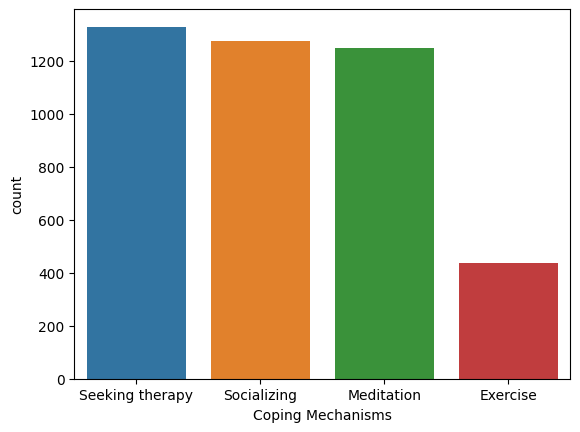

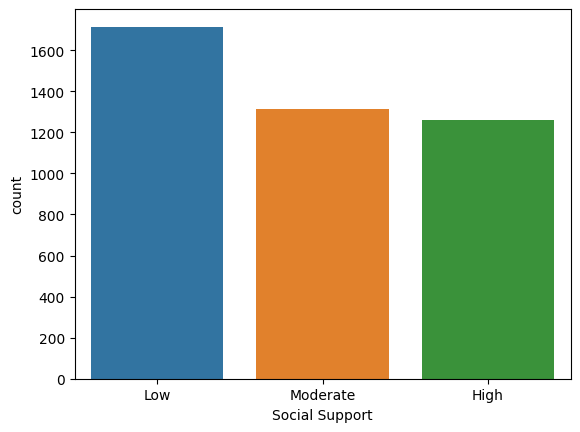

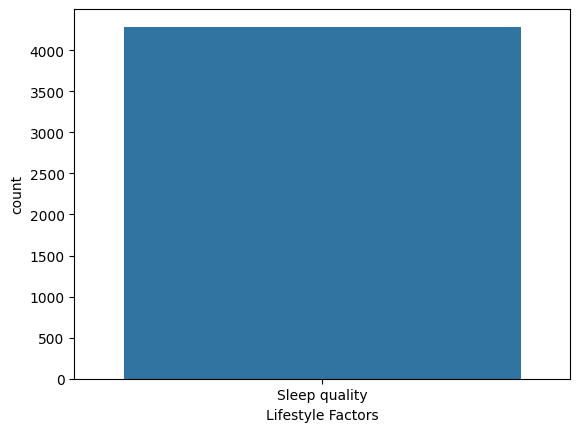

In [11]:
for col in train_df.columns:
    if col == "Participant ID" or col == "Panic Disorder Diagnosis":
        continue
    fig, ax = plt.subplots(1,1)
    sns.countplot(train_df[train_df["Panic Disorder Diagnosis"]==1], x=col)

In [75]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = [
    'Gender',
    'Family History',
    'Personal History',
    'Current Stressors',
    'Symptoms',
    'Severity',
    'Impact on Life',
    'Demographics',
    'Medical History',
    'Psychiatric History',
    'Substance Use',
    'Coping Mechanisms',
    'Social Support',
    'Lifestyle Factors',
    'Panic Disorder Diagnosis'
]

# Display unique values for each column in the training DataFrame
for column in train_df.columns:
    print(f"Unique values for '{column}':")
    print(train_df[column].unique())
    print()

Unique values for 'Participant ID':
[     1      2      3 ...  99998  99999 100000]

Unique values for 'Age':
[38 51 32 64 31 63 46 21 22 25 45 59 43 41 35 52 20 57 30 34 39 60 44 27
 36 24 55 28 18 29 62 19 58 49 61 37 53 40 26 48 54 33 50 65 42 56 23 47]

Unique values for 'Gender':
['Male' 'Female']

Unique values for 'Family History':
['No' 'Yes']

Unique values for 'Personal History':
['Yes' 'No']

Unique values for 'Current Stressors':
['Moderate' 'High' 'Low']

Unique values for 'Symptoms':
['Shortness of breath' 'Panic attacks' 'Chest pain' 'Dizziness'
 'Fear of losing control']

Unique values for 'Severity':
['Mild' 'Moderate' 'Severe']

Unique values for 'Impact on Life':
['Mild' 'Significant' 'Moderate']

Unique values for 'Demographics':
['Rural' 'Urban']

Unique values for 'Medical History':
['Diabetes' 'Asthma' nan 'Heart disease']

Unique values for 'Psychiatric History':
['Bipolar disorder' 'Anxiety disorder' 'Depressive disorder' nan]

Unique values for 'Substance Use'

In [13]:
target = "Panic Disorder Diagnosis"
x_train=train_df.drop(columns=[target])
y_train=train_df[target]

In [95]:
age_train = x_train.loc[:, "Age"].copy().reset_index(drop=True)
categorical_columns_train = x_train.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
x_train_categorical_encoded = encoder.fit_transform(x_train[categorical_columns_train])
x_train_encoded = pd.DataFrame(x_train_categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns_train))
x_train_preprocessed = pd.concat([x_train_encoded, age_train], axis=1)

x_train_preprocessed.shape
for column in x_train_preprocessed.columns:
    print(f"Unique values for '{column}':")
    print(x_train_preprocessed[column].unique())
    print()

Unique values for 'Gender_Female':
[0. 1.]

Unique values for 'Gender_Male':
[1. 0.]

Unique values for 'Family History_No':
[1. 0.]

Unique values for 'Family History_Yes':
[0. 1.]

Unique values for 'Personal History_No':
[0. 1.]

Unique values for 'Personal History_Yes':
[1. 0.]

Unique values for 'Current Stressors_High':
[0. 1.]

Unique values for 'Current Stressors_Low':
[0. 1.]

Unique values for 'Current Stressors_Moderate':
[1. 0.]

Unique values for 'Symptoms_Chest pain':
[0. 1.]

Unique values for 'Symptoms_Dizziness':
[0. 1.]

Unique values for 'Symptoms_Fear of losing control':
[0. 1.]

Unique values for 'Symptoms_Panic attacks':
[0. 1.]

Unique values for 'Symptoms_Shortness of breath':
[1. 0.]

Unique values for 'Severity_Mild':
[1. 0.]

Unique values for 'Severity_Moderate':
[0. 1.]

Unique values for 'Severity_Severe':
[0. 1.]

Unique values for 'Impact on Life_Mild':
[1. 0.]

Unique values for 'Impact on Life_Moderate':
[0. 1.]

Unique values for 'Impact on Life_Signi

In [15]:
target = "Panic Disorder Diagnosis"
x_test=test_df.drop(columns=[target])
y_test=test_df[target]
x_test.shape

(20000, 16)

In [16]:
age_test = x_test['Age'].copy().reset_index(drop=True)
categorical_columns_test = x_test.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(x_train[categorical_columns_train])

x_test_categorical_encoded = encoder.transform(x_test[categorical_columns_test])
x_test_encoded = pd.DataFrame(x_test_categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns_test))

x_test_preprocessed = pd.concat([x_test_encoded, age_test.reset_index(drop=True)], axis=1)

print(x_test_preprocessed.head())
print(f"Size of x_test_preprocessed: {x_test_preprocessed.shape[0]}")


   Gender_Female  Gender_Male  Family History_No  Family History_Yes  \
0            0.0          1.0                0.0                 1.0   
1            1.0          0.0                0.0                 1.0   
2            0.0          1.0                0.0                 1.0   
3            1.0          0.0                0.0                 1.0   
4            1.0          0.0                0.0                 1.0   

   Personal History_No  Personal History_Yes  Current Stressors_High  \
0                  1.0                   0.0                     1.0   
1                  1.0                   0.0                     0.0   
2                  0.0                   1.0                     1.0   
3                  0.0                   1.0                     0.0   
4                  1.0                   0.0                     1.0   

   Current Stressors_Low  Current Stressors_Moderate  Symptoms_Chest pain  \
0                    0.0                         0.0     

In [17]:
x_test_preprocessed.shape

(20000, 44)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_preprocessed["Age"] = scaler.fit_transform(x_train_preprocessed["Age"].values.reshape(-1, 1))
x_train_preprocessed.head()

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.249604
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.689761
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.683157
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.629126
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.755416


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_test_preprocessed["Age"] = scaler.fit_transform(x_test_preprocessed["Age"].values.reshape(-1, 1))
x_test_preprocessed.head()

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.035230
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.547389
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.683298
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.035230
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.395268


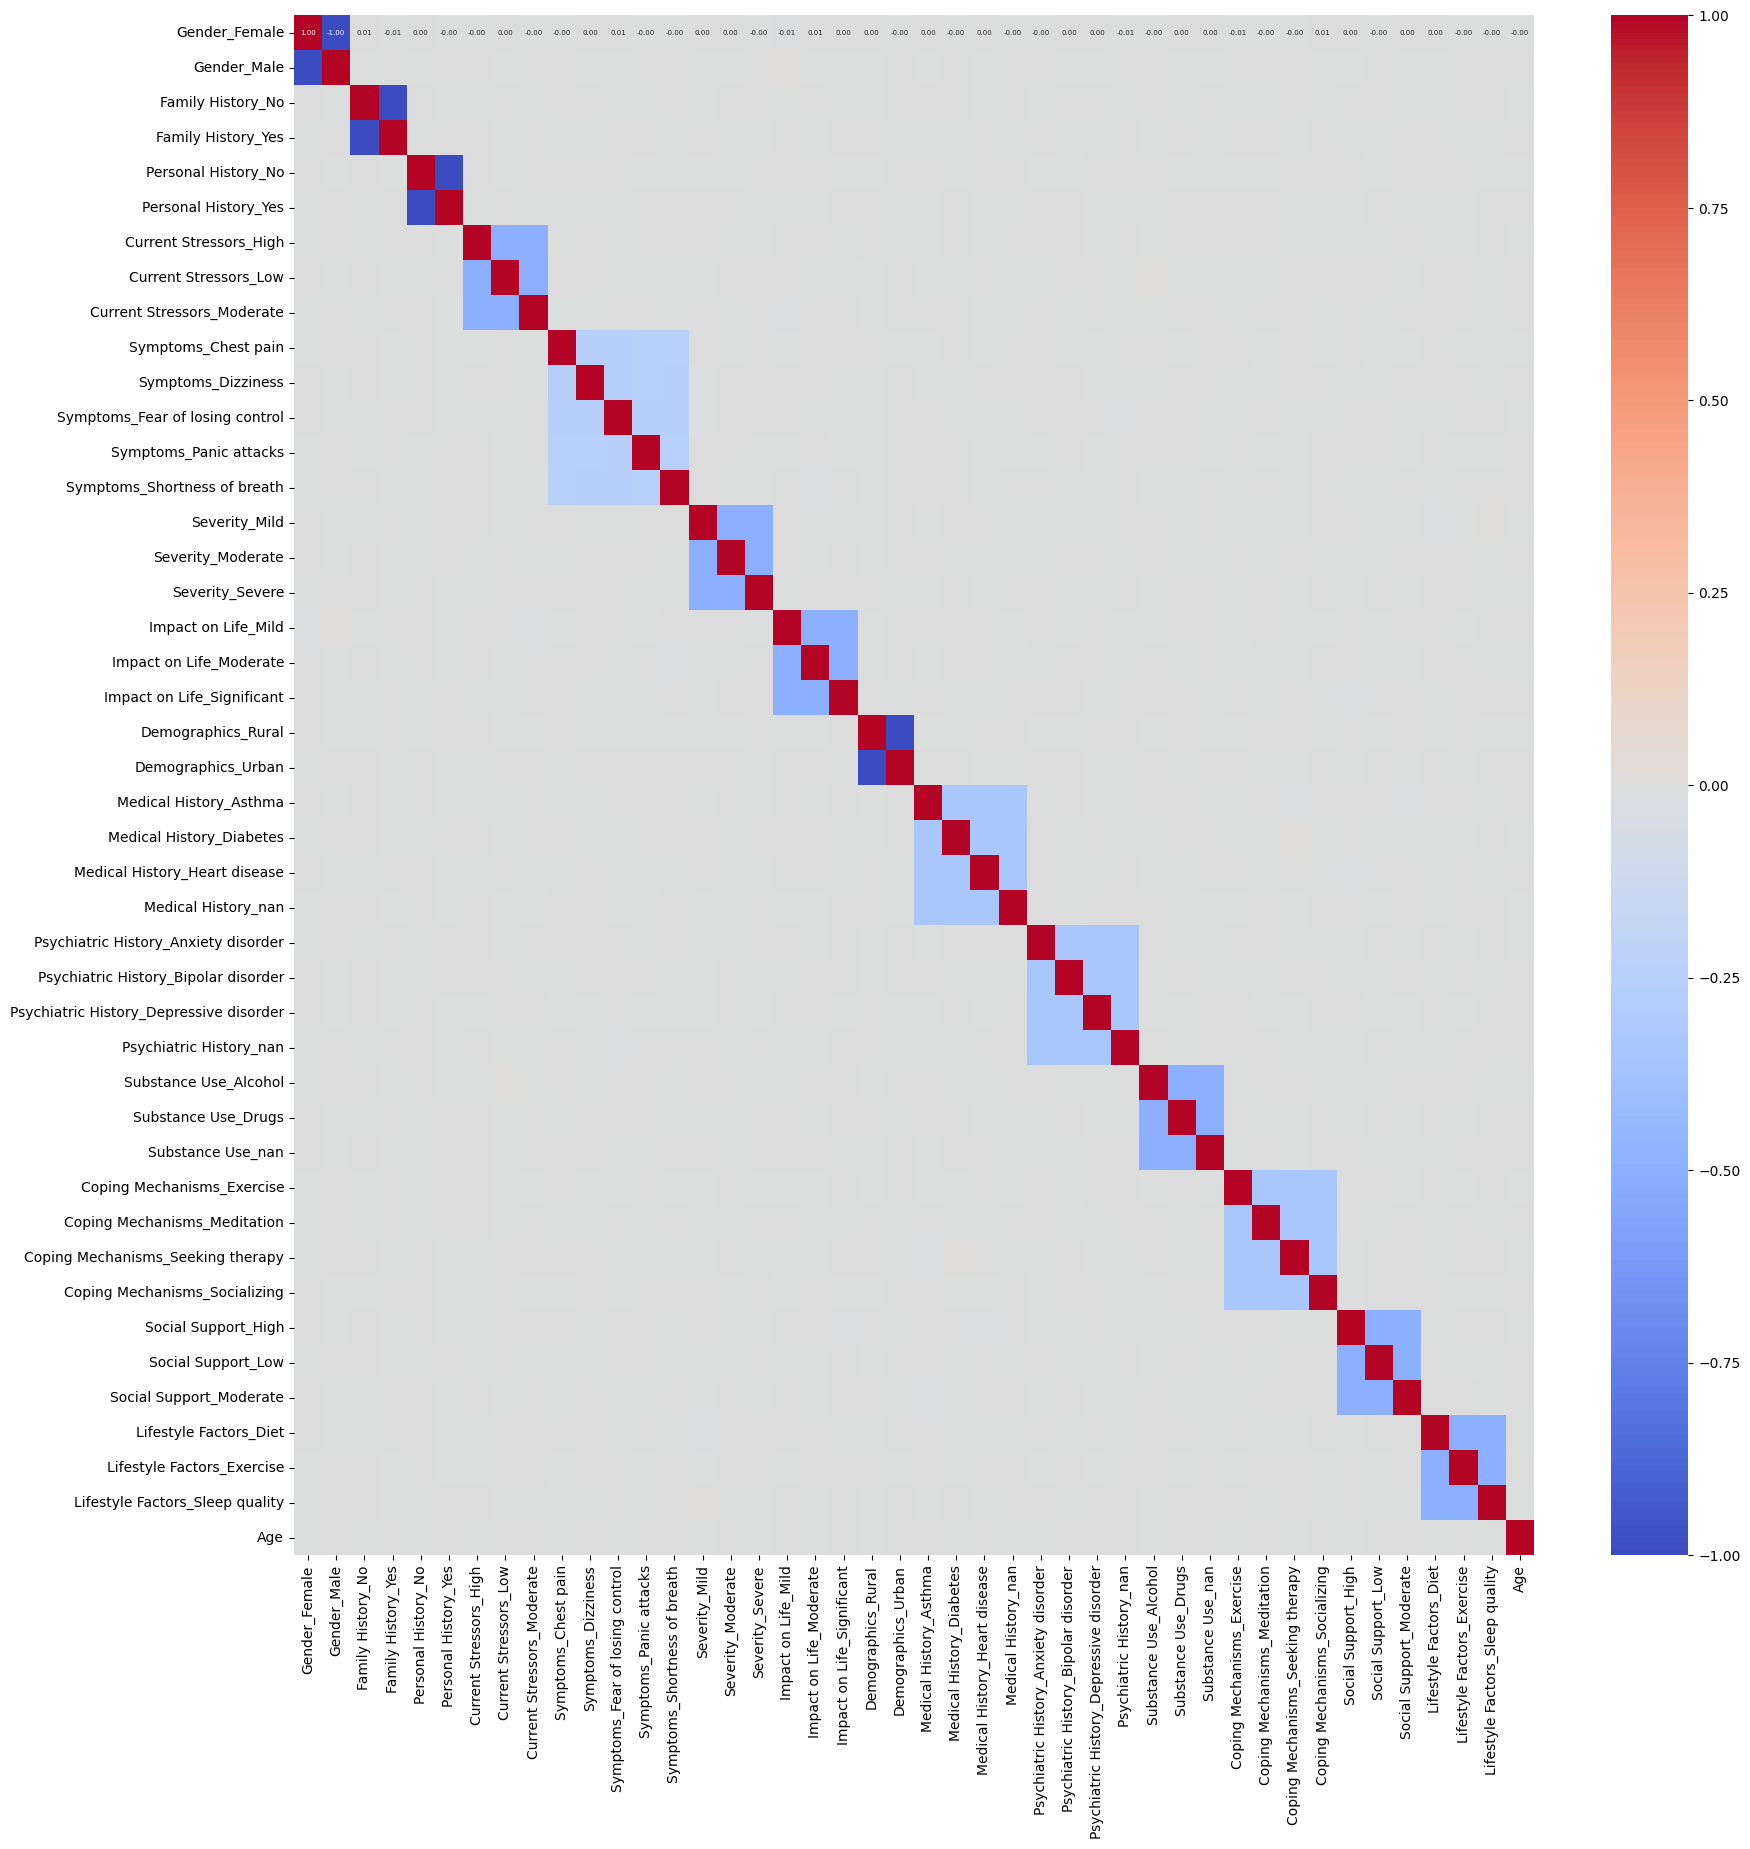

In [20]:
plt.figure(figsize=(20, 20))
sns.heatmap(x_train_preprocessed.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 5})
plt.show()

##Cross validating models

5.1 Preparing cross validation of models

In [21]:
target="Panic Disorder Diagnosis"

X=x_train_preprocessed
Y=y_train

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=42
)

X_test = x_test_preprocessed
Y_test = y_test

In [23]:

print("Training size: ", X_train.shape[0])
print("Validation size: ", X_validation.shape[0])
print("Testing size: ", X_test.shape[0])

Training size:  70000
Validation size:  30000
Testing size:  20000


## Training & Evaluating models

###6.1 Training models

In [24]:
#SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score

svc_model = SVC()
svc_model.fit(X_train, Y_train)

SVC()

In [25]:
svc_model_predictions = svc_model.predict(X_validation)

In [26]:
#scoring and evaluating svc
svc_model_recall=recall_score(Y_validation,svc_model_predictions)
print(svc_model_recall)

1.0


In [27]:
svc_model_recall=accuracy_score(Y_validation,svc_model_predictions)
print(svc_model_recall)

1.0


In [28]:
svc_model_precision=precision_score(Y_validation,svc_model_predictions)
print(svc_model_precision)

1.0


In [29]:
#F1 score
svc_model_f1=f1_score(Y_validation,svc_model_predictions)
print(svc_model_f1)

1.0


In [30]:
#cross_val_score
svc_model_cross_val_score=cross_val_score(svc_model,X,Y,cv=5)

In [31]:
##using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)


RandomForestClassifier()

In [32]:

rf_model_predictions = rf_model.predict(X_validation)
rf_model_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
#accuracy
rf_model_recall=accuracy_score(Y_validation,rf_model_predictions)
print(rf_model_recall)

0.9994


In [34]:
#precision
rf_model_precision=precision_score(Y_validation,rf_model_predictions)
print(rf_model_precision)

0.9976525821596244


In [35]:
#recall
rf_model_recall=recall_score(Y_validation,rf_model_predictions)
print(rf_model_recall)

0.9883720930232558


In [36]:
#F1
rf_model_f1=f1_score(Y_validation,rf_model_predictions)
print(rf_model_f1)

0.9929906542056075


In [37]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [38]:
#predict
lr_model_predictions = lr_model.predict(X_validation)
lr_model_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
#accuracy
lr_model_accuracy=accuracy_score(Y_validation,lr_model_predictions)
print(lr_model_accuracy)

0.9691


In [40]:
#recall
lr_model_recall=recall_score(Y_validation,lr_model_predictions)
print(lr_model_recall)

0.5077519379844961


In [41]:
#f1
lr_model_f1=f1_score(Y_validation,lr_model_predictions)
print(lr_model_f1)


0.5856057219490389


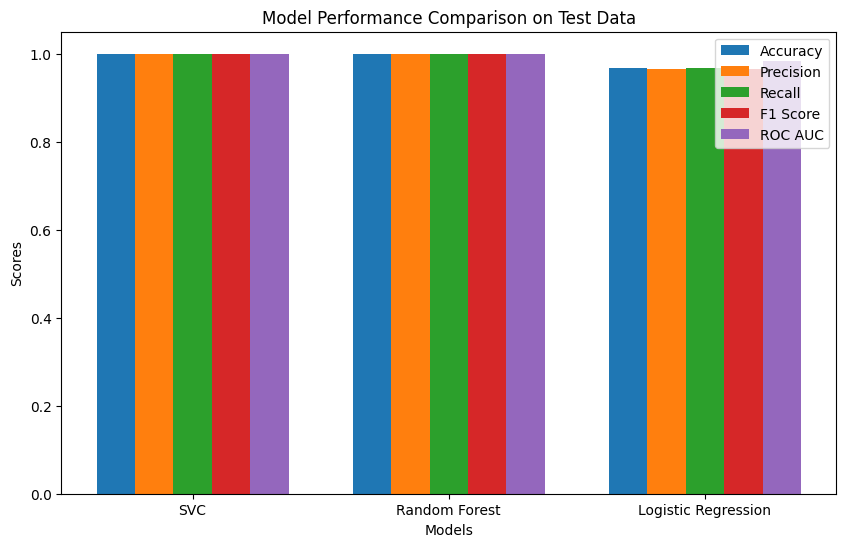

In [44]:
#Now testing all three of them on the test data
# Generate predictions
svc_preds = svc_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
lr_preds = lr_model.predict(X_test)

# Calculate metrics for each model
models = ['SVC', 'Random Forest', 'Logistic Regression']
accuracy = [
    accuracy_score(Y_test, svc_preds),
    accuracy_score(Y_test, rf_preds),
    accuracy_score(Y_test, lr_preds)
]

precision = [
    precision_score(Y_test, svc_preds, average='weighted'),
    precision_score(Y_test, rf_preds, average='weighted'),
    precision_score(Y_test, lr_preds, average='weighted')
]

recall = [
    recall_score(Y_test, svc_preds, average='weighted'),
    recall_score(Y_test, rf_preds, average='weighted'),
    recall_score(Y_test, lr_preds, average='weighted')
]

f1 = [
    f1_score(Y_test, svc_preds, average='weighted'),
    f1_score(Y_test, rf_preds, average='weighted'),
    f1_score(Y_test, lr_preds, average='weighted')
]

# ROC AUC score (Note: Only applicable for binary classification or using probability estimates)
# Assuming binary classification here, else this should be skipped or modified for multiclass
roc_auc = [
    roc_auc_score(Y_test, svc_model.decision_function(X_test)),
    roc_auc_score(Y_test, rf_model.predict_proba(X_test)[:, 1]),
    roc_auc_score(Y_test, lr_model.predict_proba(X_test)[:, 1])
]

# Plotting the results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
values = [accuracy, precision, recall, f1, roc_auc]

# Create a plot for the metrics
x = np.arange(len(models))
width = 0.15  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, values[i], width, label=metric)

ax.set_xticks(x + width * 2)
ax.set_xticklabels(models)
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison on Test Data')
ax.legend()

plt.show()

In [45]:
import joblib

# Assuming your SVC model is named 'svc_model'
# Export the model to a file
joblib.dump(svc_model, 'svc_model.pkl')



['svc_model.pkl']

In [46]:
test_df=pd.read_csv('./Dataset/panic_disorder_dataset_testing.csv')
target = "Panic Disorder Diagnosis"
x_test=test_df.drop(columns=[target])
y_test=test_df[target]
x_test.shape

(20000, 16)

In [47]:
age_test = x_test['Age'].copy().reset_index(drop=True)
categorical_columns_test = x_test.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(x_train[categorical_columns_train])

x_test_categorical_encoded = encoder.transform(x_test[categorical_columns_test])
x_test_encoded = pd.DataFrame(x_test_categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns_test))

x_test_preprocessed = pd.concat([x_test_encoded, age_test.reset_index(drop=True)], axis=1)

print(x_test_preprocessed.head())
print(f"Size of x_test_preprocessed: {x_test_preprocessed.shape[0]}")


   Gender_Female  Gender_Male  Family History_No  Family History_Yes  \
0            0.0          1.0                0.0                 1.0   
1            1.0          0.0                0.0                 1.0   
2            0.0          1.0                0.0                 1.0   
3            1.0          0.0                0.0                 1.0   
4            1.0          0.0                0.0                 1.0   

   Personal History_No  Personal History_Yes  Current Stressors_High  \
0                  1.0                   0.0                     1.0   
1                  1.0                   0.0                     0.0   
2                  0.0                   1.0                     1.0   
3                  0.0                   1.0                     0.0   
4                  1.0                   0.0                     1.0   

   Current Stressors_Low  Current Stressors_Moderate  Symptoms_Chest pain  \
0                    0.0                         0.0     

In [54]:
svc_preds = svc_model.predict(x_test_preprocessed)[6]
svc_preds

0

In [57]:
y_test[6]

1

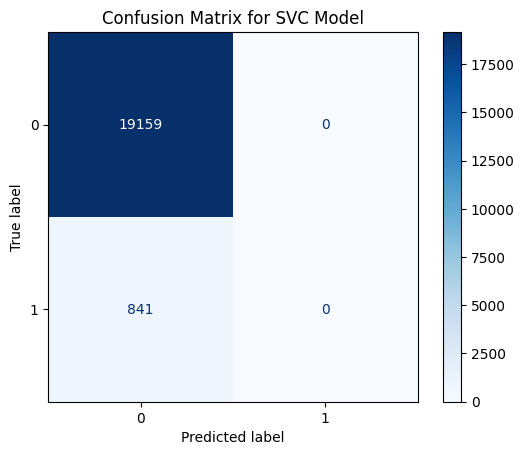

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you want to check the confusion matrix for the SVC model
svc_preds = svc_model.predict(x_test_preprocessed)

# Compute the confusion matrix
cm = confusion_matrix(y_test, svc_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVC Model')
plt.show()

In [60]:
lr_model.predict(x_test_preprocessed)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

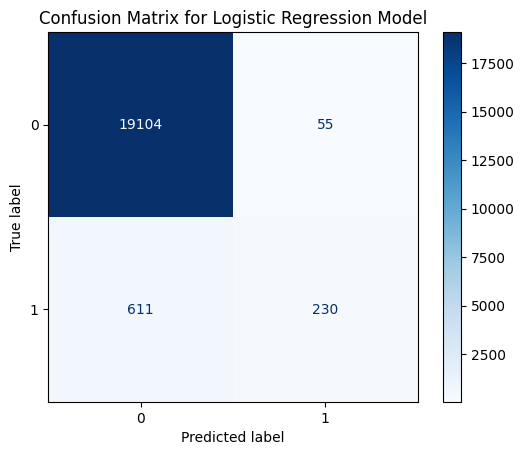

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions using the Logistic Regression model
lr_preds = lr_model.predict(x_test_preprocessed)

# Compute the confusion matrix
cm_lr = confusion_matrix(y_test, lr_preds)

# Display the confusion matrix
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)
disp_lr.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

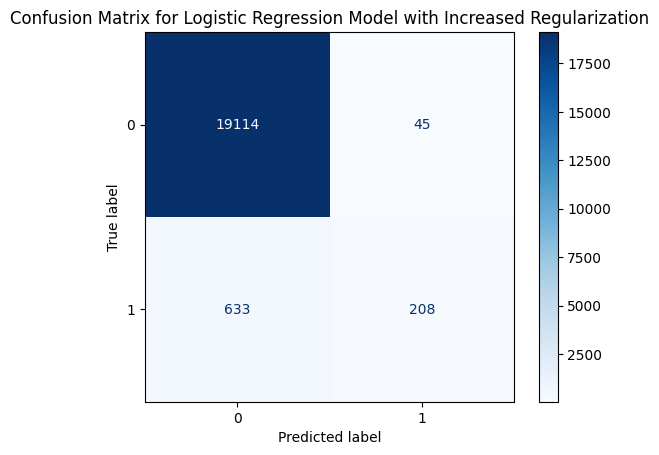

In [62]:
# ... existing imports ...
from sklearn.linear_model import LogisticRegressionCV

# Increase regularization by decreasing C
lr_model = LogisticRegressionCV(cv=5, penalty='l2', solver='liblinear', Cs=[0.01, 0.1, 1, 10, 100])
lr_model.fit(X_train, Y_train)

# Generate predictions
lr_preds = lr_model.predict(x_test_preprocessed)

# Compute and display confusion matrix
cm_lr = confusion_matrix(y_test, lr_preds)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)
disp_lr.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Model with Increased Regularization')
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits


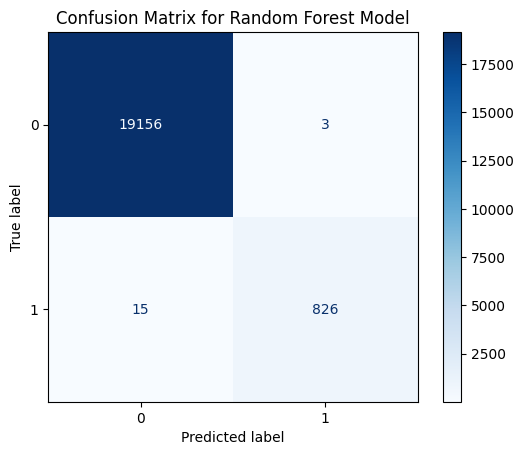

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier()

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

# Best model from grid search
best_rf_model = grid_search.best_estimator_

# Generate predictions
rf_preds = best_rf_model.predict(x_test_preprocessed)

# Compute and display confusion matrix
cm_rf = confusion_matrix(y_test, rf_preds)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf_model.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

c:\Users\Vansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


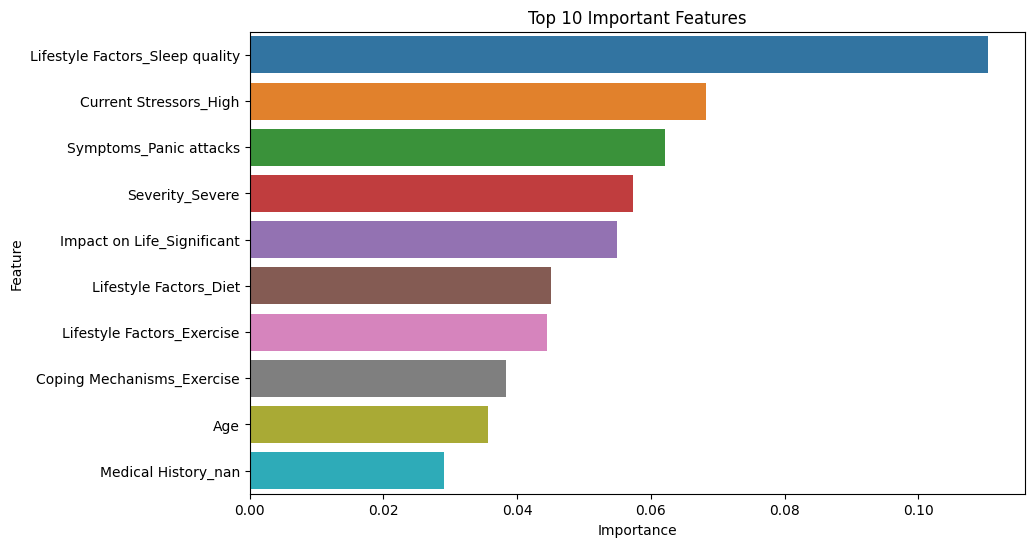

In [64]:
   importances = best_rf_model.feature_importances_
   feature_names = X_train.columns
   feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
   feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

   # Plotting feature importance
   plt.figure(figsize=(10, 6))
   sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
   plt.title('Top 10 Important Features')
   plt.show()

In [83]:
svc_preds = best_rf_model.predict(x_test_preprocessed)
s=y_test==svc_preds
if(s!=)

0        True
1        True
2        True
3        True
4        True
         ... 
19995    True
19996    True
19997    True
19998    True
19999    True
Name: Panic Disorder Diagnosis, Length: 20000, dtype: bool

In [93]:
svc_preds = best_rf_model.predict(x_test_preprocessed)[10]
s = y_test[10] == svc_preds
s

True

In [65]:
# Load the trained Random Forest model from the file
loaded_rf_model = joblib.load('best_random_forest_model.pkl')

print("Model loaded successfully!")

FileNotFoundError: [Errno 2] No such file or directory: 'best_random_forest_model.pkl'

In [69]:
import numpy as np

# Assuming y_test is a NumPy array
indexes = np.where(y_test == 1)[0]
print("Indexes where y is 1:", indexes)

Indexes where y is 1: [    6    10    36    45    69   100   161   181   186   190   227   249
   253   265   276   422   435   475   511   541   546   566   611   617
   709   713   734   743   771   773   787   850   858   859   876   939
  1063  1082  1085  1160  1195  1199  1230  1295  1358  1433  1449  1476
  1485  1505  1512  1521  1539  1544  1548  1580  1610  1620  1629  1631
  1672  1767  1806  1826  1828  1846  1870  1894  1936  1940  1960  1996
  2018  2021  2026  2027  2076  2088  2096  2104  2129  2160  2187  2194
  2229  2356  2360  2416  2496  2524  2602  2631  2637  2686  2742  2753
  2766  2778  2805  2817  2844  2850  2857  2871  2874  2883  2892  2973
  2979  2982  3048  3078  3109  3191  3197  3228  3248  3264  3301  3317
  3357  3377  3398  3408  3429  3468  3486  3514  3518  3532  3574  3576
  3611  3641  3672  3684  3710  3715  3728  3738  3745  3754  3757  3758
  3770  3799  3825  3834  3841  3842  3888  3954  3959  4001  4017  4023
  4036  4210  4277  4288  430

In [66]:
import joblib

# Export the trained Random Forest model to a file
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')

print("Model exported successfully!")

Model exported successfully!


In [71]:
# Load the trained Random Forest model from the file
loaded_rf_model = joblib.load('best_random_forest_model.pkl')

print("Model loaded successfully!")

Model loaded successfully!


In [72]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib

# Assuming x_train is your training DataFrame
# Example x_train DataFrame structure
# x_train = pd.DataFrame({
#     'Age': [25, 30, 22, 35],
#     'Gender': ['Male', 'Female', 'Female', 'Male'],
#     'Family History': ['Yes', 'No', 'Yes', 'No'],
#     # Add other columns as necessary
# })

# Step 1: Handle missing values in categorical columns
categorical_columns_train = x_train.select_dtypes(include=['object']).columns
x_train[categorical_columns_train] = x_train[categorical_columns_train].fillna('Unknown')

# Step 2: Initialize and fit the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(x_train[categorical_columns_train])

# Step 3: Scale the 'Age' column
scaler = StandardScaler()
age_train = x_train['Age'].values.reshape(-1, 1)
scaler.fit(age_train)

# Step 4: Save the encoder and scaler
joblib.dump(encoder, 'encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Encoder and scaler saved successfully!")

Encoder and scaler saved successfully!


In [80]:
x_test_preprocessed[6]

KeyError: 6